In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Konfiguration neuronale Netze

In [2]:
class NeuronalNetScalar(nn.Module):
        def __init__(self):
            super(NeuronalNetScalar, self).__init__()
            self.lin1 = nn.Linear(8,15)
            self.lin2 = nn.Linear(15,15)
            self.lin3 = nn.Linear(15,1)
        def forward(self,x):
            x = self.lin1(x)
            x = F.relu(x)
            x = F.relu(self.lin2(x))
            x = F.relu(self.lin3(x))
            return x

# Datenbeschaffung

In [3]:
#Die Tore der einzelnen Mannschaften pro Spiel aus den matches in eine Liste schreiben
def inputValuesScalar(gameList, df_stats,inputList):
    for match in gameList:
        homeTeam = match.iat[0,0]
        awayTeam = match.iat[0,1]
        input_values= df_stats[df_stats['HomeTeam']==homeTeam]
        input_values= input_values[input_values['AwayTeam']==awayTeam]
        input_values= input_values.reset_index(drop=True)
        input_values = input_values[:-1]
        inputList.append(input_values.loc[:,['FTHG','FTAG']])

In [4]:
#Methode um aus einer Liste eine Tensorliste mit Floatwerten generieren
def dfToTensor(dfList, tensorList):
    for df in dfList:
        tensor = torch.FloatTensor(df.values).view(8)
        tensorList.append(tensor)

In [5]:
def dfToTensor_target(dfList, tensorList):
    for df in dfList:
        tensor = torch.FloatTensor(df).view(1)
        tensorList.append(tensor)

# Output Scalar

In [6]:
#Outputvalues generieren, indem bei Heimsieg 0, bei unentschieden 1 und bei Auswärtssieg 2 gesetzt wird
def targetValuesScalar(gameList, df_stats,targetList):
    for match in gameList:
        homeTeam = match.iat[0,0]
        awayTeam = match.iat[0,1]
        target_values= df_stats[df_stats['HomeTeam']==homeTeam]
        target_values= target_values[target_values['AwayTeam']==awayTeam]
        target_values= target_values.reset_index(drop=True)
        target_values = target_values.tail(1)
        target_values = target_values.loc[:,['FTHG','FTAG']]
        homegoals = target_values.loc[:,['FTHG']].iloc[0]['FTHG']
        awaygoals = target_values.loc[:,['FTAG']].iloc[0]['FTAG']
        if homegoals > awaygoals:
            df_out=[0.]
        if homegoals == awaygoals:
            df_out=[1.]
        if homegoals < awaygoals:
            df_out=[2.]
        targetList.append(df_out)

# Input Scalar

In [7]:
#Pfade Fabian
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/09_10-13_14.csv
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/10_11-14_15.csv
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/11_12-15_16.csv
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/12_13-16_17.csv
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/13_14-17_18.csv
#/Users/fabian-maltemoller/Developer/Ki/KI_Daten/14_15-18_19.csv

#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\09_10-13_14.csv
#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\10_11-14_15.csv
#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\11_12-15_16.csv
#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\12_13-16_17.csv
#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\13_14-17_18.csv
#C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\14_15-18_19.csv

In [8]:
def scalarInputTarget(path,inputListe,targetListe):
    topTeams = pd.read_csv(path, sep=';')
    df = pd.DataFrame(topTeams, columns = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR'])
    df_names = df.drop_duplicates(['HomeTeam','AwayTeam'],keep = 'last')
    df_names = df_names[['HomeTeam','AwayTeam']]
    gameListe = []
    for row in df_names.itertuples():
        data = [[row.HomeTeam,row.AwayTeam]]
        gameListe.append(pd.DataFrame(data))
    inputValuesScalar(gameListe, df,inputListe)
    targetValuesScalar(gameListe,df,targetListe)

In [9]:
inputList_0910_1314_Scalar = []
targetList_0910_1314_Scalar = []
scalarInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/09_10-13_14.csv',inputList_0910_1314_Scalar,targetList_0910_1314_Scalar)
#new_inputs('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\09_10-13_14.csv',inputList_0910_1314,targetList_0910_1314)

inputList_1011_1415_Scalar = []
targetList_1011_1415_Scalar = []
scalarInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/10_11-14_15.csv',inputList_1011_1415_Scalar,targetList_1011_1415_Scalar)
#new_inputs('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\10_11-14_15.csv',inputList_1011_1415,targetList_1011_1415)

inputList_1112_1516_Scalar = []
targetList_1112_1516_Scalar = []
scalarInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/11_12-15_16.csv',inputList_1112_1516_Scalar,targetList_1112_1516_Scalar)
#new_inputs('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\11_12-15_16.csv',inputList_1112_1516,targetList_1112_1516)

inputList_1213_1617_Scalar = []
targetList_1213_1617_Scalar = []
scalarInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/12_13-16_17.csv',inputList_1213_1617_Scalar,targetList_1213_1617_Scalar)
#new_inputs('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\12_13-16_17.csv',inputList_1213_1617,targetList_1213_1617)

inputList_1314_1718_Scalar = []
targetList_1314_1718_Scalar = []
scalarInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/13_14-17_18.csv',inputList_1314_1718_Scalar,targetList_1314_1718_Scalar)
#new_inputs('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\13_14-17_18.csv',inputList_1314_1718,targetList_1314_1718)

inputList_1415_1819_Scalar = []
targetList_1415_1819_Scalar = []
scalarInputTarget('/Users/fabian-maltemoller/Developer/Ki/KI_Daten/14_15-18_19.csv',inputList_1415_1819_Scalar,targetList_1415_1819_Scalar)
#new_inputs('C:\\Users\\dusti\\iCloudDrive\\Studium WI\\WS2019\\KI\\csvData\\14_15-18_19.csv',inputList_1415_1819,targetList_1415_1819)

In [10]:
#In Liste inputList_1415_1819_Scalar waren leere Dataframes drin, die werden in diesem Zwischenschritt rausgelöscht
for i in range(len(inputList_1415_1819_Scalar)):
    if inputList_1415_1819_Scalar[i].empty:
        print(i)

11
14
32
46
54
63
85
92
97
109
116


In [11]:
inputList_1415_1819_Scalar.pop(11)
inputList_1415_1819_Scalar.pop(13)
inputList_1415_1819_Scalar.pop(30)
inputList_1415_1819_Scalar.pop(43)
inputList_1415_1819_Scalar.pop(50)
inputList_1415_1819_Scalar.pop(58)
inputList_1415_1819_Scalar.pop(79)
inputList_1415_1819_Scalar.pop(85)
inputList_1415_1819_Scalar.pop(89)
inputList_1415_1819_Scalar.pop(100)
inputList_1415_1819_Scalar.pop(106)

targetList_1415_1819_Scalar.pop(11)
targetList_1415_1819_Scalar.pop(13)
targetList_1415_1819_Scalar.pop(30)
targetList_1415_1819_Scalar.pop(43)
targetList_1415_1819_Scalar.pop(50)
targetList_1415_1819_Scalar.pop(58)
targetList_1415_1819_Scalar.pop(79)
targetList_1415_1819_Scalar.pop(85)
targetList_1415_1819_Scalar.pop(89)
targetList_1415_1819_Scalar.pop(100)
targetList_1415_1819_Scalar.pop(106)

print(len(inputList_1415_1819_Scalar))
print(len(targetList_1415_1819_Scalar))

110
110


In [12]:
train_input_tensor = []
dfToTensor(inputList_0910_1314_Scalar,train_input_tensor)
dfToTensor(inputList_1011_1415_Scalar,train_input_tensor)
dfToTensor(inputList_1112_1516_Scalar,train_input_tensor)
dfToTensor(inputList_1213_1617_Scalar,train_input_tensor)
dfToTensor(inputList_1314_1718_Scalar,train_input_tensor)

test_input_tensor = []
dfToTensor(inputList_1415_1819_Scalar,test_input_tensor)

In [13]:
train_target_tensor = []
dfToTensor_target(targetList_0910_1314_Scalar,train_target_tensor)
dfToTensor_target(targetList_1011_1415_Scalar,train_target_tensor)
dfToTensor_target(targetList_1112_1516_Scalar,train_target_tensor)
dfToTensor_target(targetList_1213_1617_Scalar,train_target_tensor)
dfToTensor_target(targetList_1314_1718_Scalar,train_target_tensor)

test_target_tensor = []
dfToTensor_target(targetList_1415_1819_Scalar,test_target_tensor)

In [37]:
print(train_input_tensor[1])
print(train_target_tensor[1])
print(test_input_tensor[1])
print(test_target_tensor[1])

tensor([4., 0., 2., 0., 0., 0., 0., 0.])
tensor([0.])
tensor([2., 2., 2., 1., 2., 2., 0., 3.])
tensor([2.])


# Training und Evaluation

In [38]:
class Evaluation():
    def __init__(self, net,n_epoch):
        self.net = net
        self.n_epoch = n_epoch
        self.criterion = nn.L1Loss()
        #self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.net.parameters(), lr = 0.001, momentum = 0.9)
        #self.optimizer = torch.optim.Adam(self.net.parameters(), lr = 0.001)
        
    def train(self, input_vector, target_vector):
        for epoch in range(self.n_epoch):
            running_loss = 0.0
            for i in range(len(input_vector)):
                self.optimizer.zero_grad()
                outputs = self.net(input_vector[i])
                loss = self.criterion(outputs, target_vector[i])
                loss.backward()
                self.optimizer.step()
                #running_loss += loss.item()
                #if i % 710 == 709:
                    #print(running_loss/ 710)
        #print('Finished Training')
    
    def test(self, input_vector, target_vector):
        correct = 0
        total = 0
        with torch.no_grad():
            for i in range(len(input_vector)):
                outputs = self.net(input_vector[i])
                if outputs < (2/3):
                    predicted = 0
                elif outputs < (1+1/3):
                    predicted = 1
                else:
                    predicted = 2
                if predicted == target_vector[i].sum().item():
                    correct = correct +1
        accuracy = correct/len(input_vector)
        return(accuracy)

In [39]:
train_accuracy = {}
test_accuracy = {}
for n_epoch in [1,2,3,4,5,6,7,8,9,10]:
    net = Evaluation(NeuronalNetScalar(),n_epoch)
    net.train(train_input_tensor,train_target_tensor)
    test_accuracy[n_epoch] = net.test(test_input_tensor,test_target_tensor)
    train_accuracy[n_epoch] = net.test(train_input_tensor,train_target_tensor)

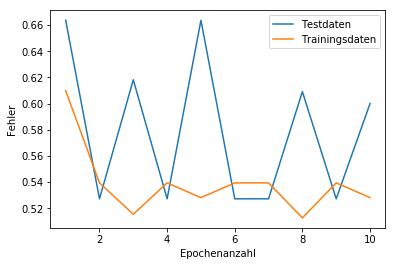

In [40]:
test_tuple = sorted(test_accuracy.items())
train_tuple = sorted(train_accuracy.items())

test_x, test_y = zip(*test_tuple)
test_y = [1-val for val in test_y]
train_x, train_y = zip(*train_tuple)
train_y = [1-val for val in train_y]

test_line= plt.plot(test_x, test_y, label='Testdaten')
trainings_line= plt.plot(train_x , train_y, label="Trainingsdaten")

plt.legend()
plt.xlabel("Epochenanzahl")
plt.ylabel("Fehler")
plt.show()